In [10]:
import pandas as pd
import numpy as np
import scipy
from scipy.io import arff
from scipy.io.arff import loadarff
import glob
import matplotlib.pyplot as plt
import sys

%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [11]:
#df = pd.read_csv("/Users/mainguyen/books.csv", error_bad_lines=False)

import os
path = r'/Users/mainguyen/Downloads/wisdm-dataset/arff_python'
# list comprehension
all_files = [x for x in glob.iglob(os.path.join(path, "*.arff"))]
all_data=[]

for filename in all_files: 
     raw_data = loadarff(filename)
     all_data.append(pd.DataFrame(raw_data[0]))

df = pd.concat(all_data, axis=0, ignore_index=True)



In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75099 entries, 0 to 75098
Data columns (total 93 columns):
"ACTIVITY"     75099 non-null object
"X0"           75099 non-null float64
"X1"           75099 non-null float64
"X2"           75099 non-null float64
"X3"           75099 non-null float64
"X4"           75099 non-null float64
"X5"           75099 non-null float64
"X6"           75099 non-null float64
"X7"           75099 non-null float64
"X8"           75099 non-null float64
"X9"           75099 non-null float64
"Y0"           75099 non-null float64
"Y1"           75099 non-null float64
"Y2"           75099 non-null float64
"Y3"           75099 non-null float64
"Y4"           75099 non-null float64
"Y5"           75099 non-null float64
"Y6"           75099 non-null float64
"Y7"           75099 non-null float64
"Y8"           75099 non-null float64
"Y9"           75099 non-null float64
"Z0"           75099 non-null float64
"Z1"           75099 non-null float64
"Z2"           750

In [13]:
# Clean data
# Remove unnecessary special characters "" from column names
df.columns = df.columns.str.replace('"','')
#df['ACTIVITY'] = df['ACTIVITY'].str.replace('b','')
#temp_dataframe['PPI'].replace('PPI/','',regex=True,inplace=True)


In [14]:
# PCA


In [15]:
df.head()


,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,class
0,b'A',0.060,0.110,0.215,0.255,0.240,0.070,0.030,0.010,0.005,...,0.550898,0.543819,0.751094,-0.005809,-0.376951,0.383184,0.377359,-0.103380,10.7499,b'1610'
1,b'A',0.050,0.130,0.170,0.220,0.285,0.090,0.020,0.020,0.010,...,0.545153,0.538148,0.741898,0.069865,-0.368142,0.361264,0.488030,-0.070615,10.8633,b'1610'
2,b'A',0.070,0.135,0.165,0.250,0.190,0.130,0.025,0.015,0.010,...,0.580717,0.573254,0.689070,0.227904,-0.299957,0.255459,0.568801,-0.134642,10.9722,b'1610'
3,b'A',0.075,0.145,0.140,0.205,0.275,0.105,0.010,0.025,0.020,...,0.578014,0.570586,0.686601,0.244267,-0.280844,0.259784,0.567380,-0.128378,10.9814,b'1610'
4,b'A',0.085,0.145,0.145,0.175,0.285,0.100,0.030,0.020,0.005,...,0.568111,0.560811,0.700471,0.057924,-0.399338,0.311718,0.398679,-0.245695,10.8796,b'1610'


In [38]:
from sklearn.model_selection import train_test_split 

# Set our outcome to 0 and 1.
y = df['ACTIVITY']
y = pd.get_dummies(df['ACTIVITY'])

X = df.loc[:, ~df.columns.isin(['ACTIVITY'])]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state = 101)


In [46]:
y.head()
act_type = y.columns
pr(str(act_type))

Index([b'A', b'B', b'C', b'D', b'E', b'F', b'G', b'H', b'I', b'J', b'K', b'L',
       b'M', b'O', b'P', b'Q', b'R', b'S'],
      dtype='object')


In [17]:
# 1st Method: Try out KNN Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix 

neighbors = KNeighborsClassifier(n_neighbors=1, weights ='distance')

knn = neighbors.fit(X_train,y_train)

# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
print (accuracy)
  
# creating a confusion matrix 
knn_pred = knn.predict(X_test)  


0.5454061251664447


In [25]:
#  Method: Try out Gradient Boosting Trees. 
from sklearn.multiclass import OneVsRestClassifier
from sklearn import datasets
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

params = {'n_estimators': 10, 
          'max_depth': 3, 
          'subsample': 0.5,
          'learning_rate': 0.01, 
          'min_samples_leaf': 1, 
          'random_state': 3}

# Initialize and fit the model.
clf = OneVsRestClassifier(ensemble.GradientBoostingClassifier(**params))
#clf= OneVsRestClassifier(XGBClassifier(**params))

clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

#OneVsRestClassifier(clf(random_state=0)).fit(X, y).predict(X) 


# Accuracy tables.
# table_train = pd.crosstab(y_train.values, predict_train.values, margins=True)
# table_test = pd.crosstab(y_test.values, predict_test.values, margins=True)

# train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
# train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

# test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
# test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

# print((
#     'Training set accuracy:\n'
#     'Percent Type I errors: {}\n'
#     'Percent Type II errors: {}\n\n'
#     'Test set accuracy:\n'
#     'Percent Type I errors: {}\n'
#     'Percent Type II errors: {}'
# ).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [35]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_train.values.argmax(axis=1), predict_train.argmax(axis=1))


In [33]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[3690    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [3763    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [3609    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [3802    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [3846    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [3622    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [3692    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [3730    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [3720    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [3603    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [3903    

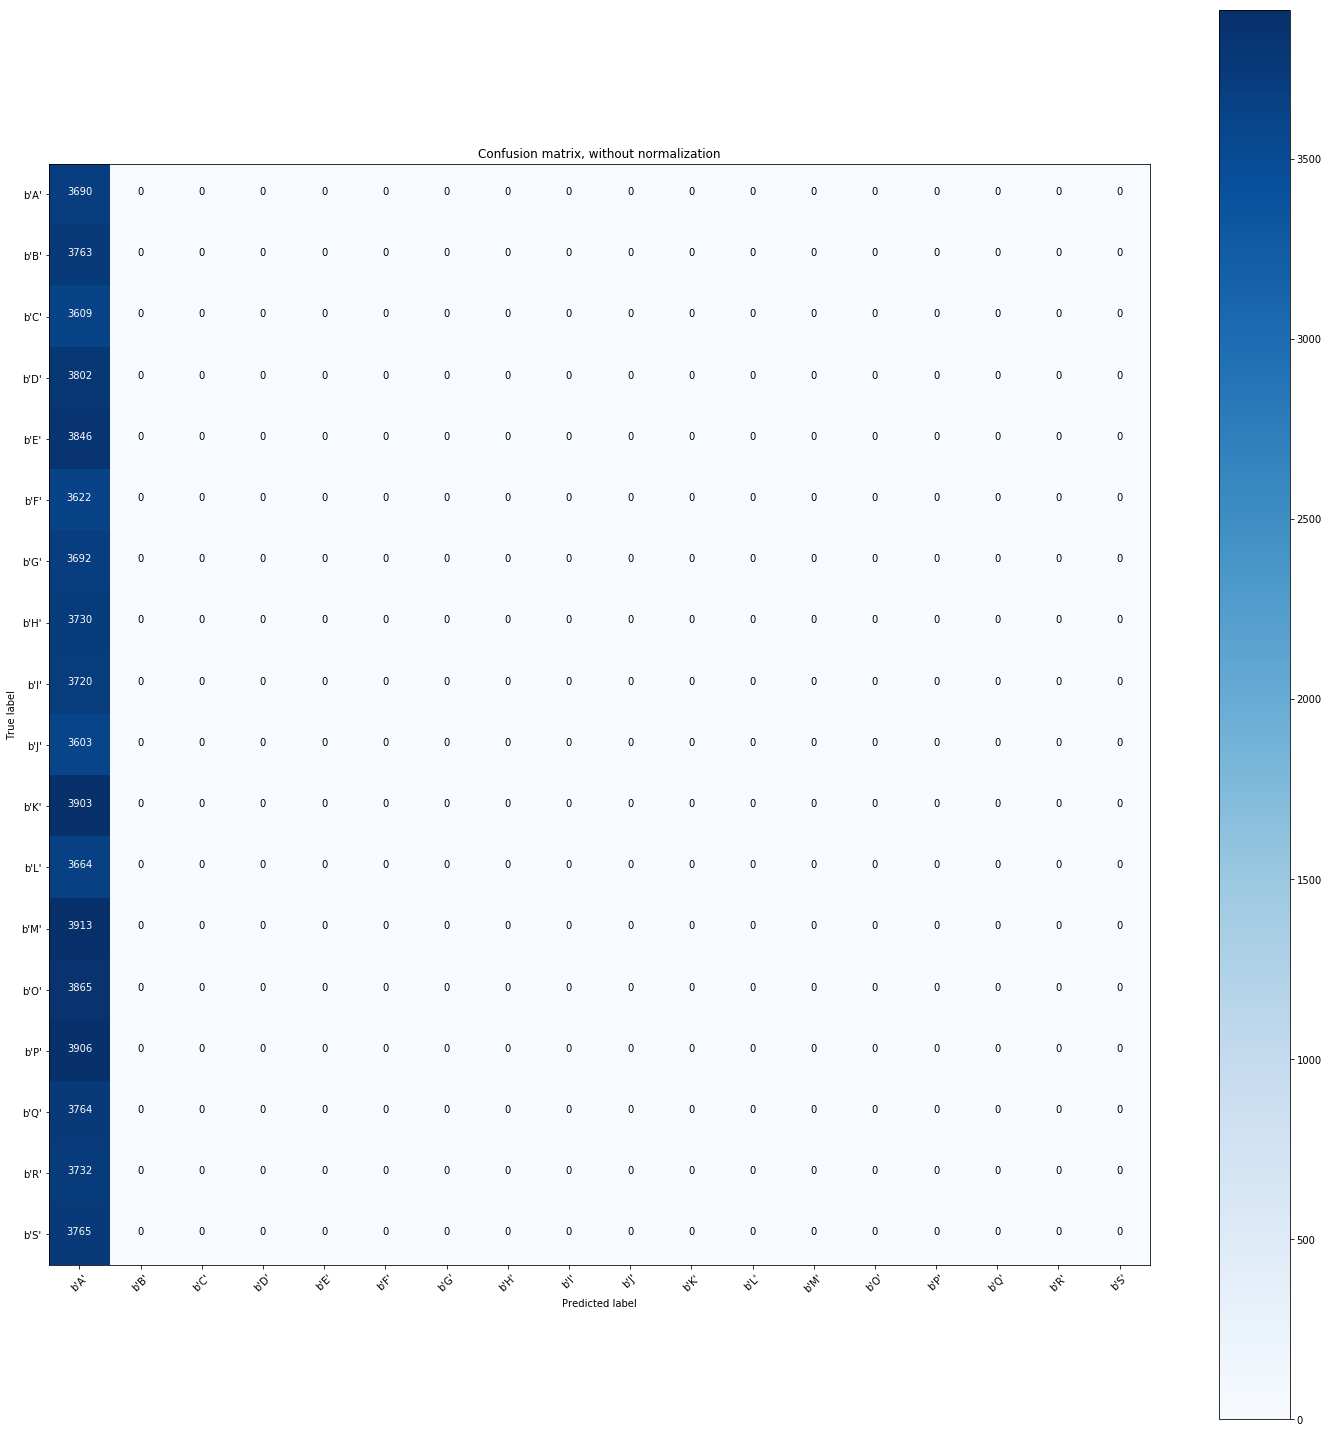

In [47]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(20,20))
plot_confusion_matrix(cnf_matrix, classes= ["b'A'", "b'B'", "b'C'", "b'D'", "b'E'", "b'F'", "b'G'", "b'H'", "b'I'", "b'J'", "b'K'", "b'L'",
       "b'M'", "b'O'", "b'P'", "b'Q'", "b'R'", "b'S'"],
                      title='Confusion matrix, without normalization')

In [19]:
y_train.shape
#y_train.head()


(67589, 18)

In [22]:
X_train.shape
#X_train.head()

(67589, 92)